In [42]:
!pip install pandas kaggle seaborn matplotlib scikit-learn[metrics] torch torchvision torchaudio torchsummary

In [3]:
!kaggle datasets download -d fantacher/neu-metal-surface-defects-data

Dataset URL: https://www.kaggle.com/datasets/fantacher/neu-metal-surface-defects-data
License(s): other
 99%|█████████████████████████████████████▋| 57.0M/57.4M [00:01<00:00, 51.1MB/s]
100%|██████████████████████████████████████| 57.4M/57.4M [00:01<00:00, 48.7MB/s]


In [4]:
!unzip neu-metal-surface-defects-data

Archive:  neu-metal-surface-defects-data.zip
  inflating: NEU Metal Surface Defects Data/Thumbs.db  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_1.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_10.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_100.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_101.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_102.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_103.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_104.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_105.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_106.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_107.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_108.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_109.bmp  
  inflating: NEU Metal Surface Defects Data/test/Inclusion/In_

# Project Description
TODO

## Goals
TODO

## Tools and Resoruces
TODO

Pytorch classifier tutorial: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Guide to freezing layers: https://medium.com/we-talk-data/guide-to-freezing-layers-in-pytorch-best-practices-and-practical-examples-8e644e7a9598

RezNext page: https://pytorch.org/hub/pytorch_vision_resnext/

Working from this project as a base to learn PyTorch: https://www.kaggle.com/code/bensonlin0731/image-classifier

In [44]:
import pathlib
import pathlib as path
import random as r

import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import torch

from torchsummary import summary
from torchvision import models

print('CUDA available:',torch.cuda.is_available())

seed = 1


CUDA available: True


## Dataset Documentation

!!!TODO: Improve

https://www.kaggle.com/datasets/fantacher/neu-metal-surface-defects-data/data

"This dataset was downloaded from the NEU Metal Surface Defects Database, which collects six kinds of typical surface defects of hot-rolled steel strips: rolled-in scale (RS), patches (Pa), crazing (Cr), pitted surface (PS), inclusion (In), and scratches (Sc). The database includes 1,800 grayscale images and 300 samples, each of six typical surface defects."

In [81]:
data_root = r'NEU Metal Surface Defects Data'
cwd = pathlib.Path.cwd()

if cwd.name == 'manufac_defect_detection':
    print("Path is project root")
else:
    print("Recomend navigating to the project root in terminal and opening your chosen idea via a command such as 'code .'")
    raise NameError('Please correct current working directory to the project root')

train_dir = path.PurePath(cwd, data_root, 'train')
test_dir = path.PurePath(cwd, data_root, 'test')
valid_dir = path.PurePath(cwd, data_root, 'valid')

Path is project root


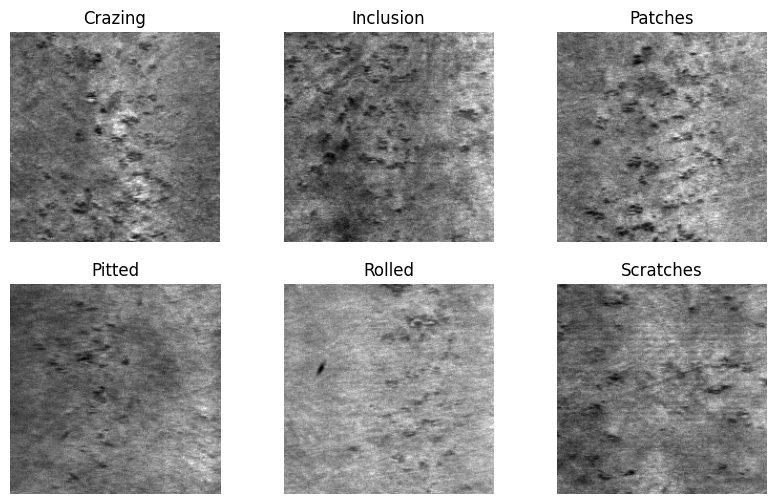

In [86]:
# TODO: Display random image from each of the 6 types of defect.
def show_rand_image_of_each(directory):

    class_names = [child.name for child in path.Path(directory).iterdir()]
    num_rows = 2
    num_columns = 3
    fig, axarr = plt.subplots(num_rows, num_columns, figsize= (10,6))

    for idx, class_name in enumerate(class_names):
        img_path = r.choice([x for x in path.Path(train_dir, 'Rolled').iterdir()])
        img = mpimg.imread(img_path)
        i = idx // num_columns
        j = idx % num_columns
        axarr[i, j].imshow(img, cmap = 'gray')
        axarr[i, j].set_title(class_name)
        axarr[i, j].axis('off')

show_rand_image_of_each(train_dir)

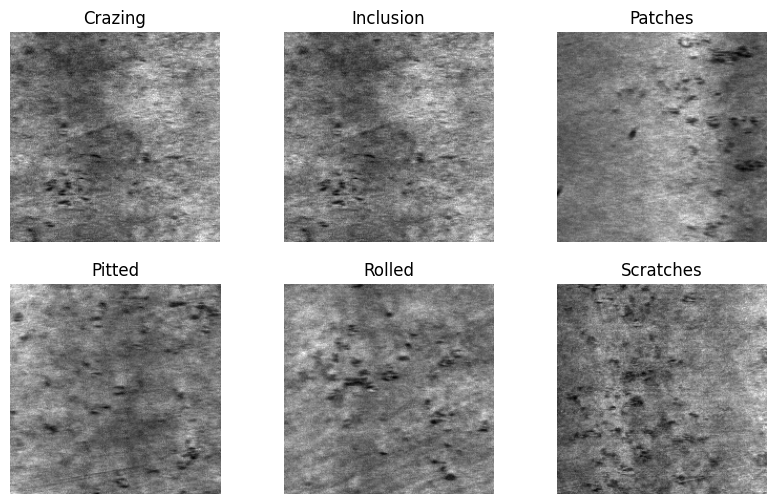

In [87]:
show_rand_image_of_each(test_dir)

In [ ]:
r.choice(path.Path)

# Image Preprocessing

1. Prepare the images for our network model
2. Augment the training data with transformations such as rotation and flipping to prevent overfitting

These two steps are essential in image recognition datasets because 

In [40]:
# TODO: Image Preprocessing
# minimum transforms for Valid and train.
#   resize, horz flip, color jitter, 30deg rotate
# Then to tensor and normalize 

# Load Pretrained model (resnet-50)

Training a new model from scratch is expensive. If possible use a pre-trained model and transfer learning to reduce model training costs.

Pre-trained models are a staple in computer-vision work, as they have been trained by large companies on extremely large datasets as general purpose tools. The weights from this general training will jumpstart more specific computer vision learning tasks tremendously.

Transfer learning is particularly useful when the dataset of interest is small. The model may fail to generalize without a larger pre-train base weights.  

Using the ResNext pretrained model from the PyTorch model database: https://pytorch.org/hub/pytorch_vision_resnext/

In [47]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnext50_32x4d(pretrained = True).to(device)
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5          [-1, 128, 56, 56]           8,192
       BatchNorm2d-6          [-1, 128, 56, 56]             256
              ReLU-7          [-1, 128, 56, 56]               0
            Conv2d-8          [-1, 128, 56, 56]           4,608
       BatchNorm2d-9          [-1, 128, 56, 56]             256
             ReLU-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          32,768
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

# Build and Train the model(s)

TODO: Freeze output layers
TODO: compare a few cases of unfrozen layers (learning)
    3 unfrozen in, out, and both



# Test the model(s)
TODO
